In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_csv('medical_examination.csv')

In [3]:
# A glimpse of the dataset
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### cholesterol / glucose: 
1 = normal
2 = above normal
3 = well above normal


In [4]:
# descriptive statistics
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Summary info on columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
# Determine if people are overweight or not
df['height'] = df['height'] / 100 
df['bmi'] = round((df['weight'])/(df['height'])**2, 2)
df['overweight'] = 0
df.loc[df['bmi'] > 25, 'overweight'] = 1
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,21.97,0
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,34.93,1
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,23.51,0
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,28.71,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,23.01,0


In [7]:
# Transform the glucose and cholesterol columns into binary (0 for good, 1 for bad)
df['gluc'] = df['gluc'].replace({1:0, 2:1, 3:1})
df['cholesterol'] = df['cholesterol'].replace({1:0, 2:1, 3:1})
df = df.drop('bmi', axis=1)

In [8]:
def draw_catplot():
    # Transform data into long format
    df_long = pd.melt(df, id_vars='cardio', value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'], var_name='variable')

    # Drwa the catplot
    fig = sns.catplot(data=df_long,x='variable',col='cardio',hue='value',kind='count',height=4, aspect=1.5, legend=True)

    # Save the figure
    fig.savefig('catplot.png', facecolor='white')

    return fig

In [9]:
def draw_heatmap():
    # Clean the data
    height_percentiles = df['height'].quantile([0.025, 0.975])
    weight_percentiles = df['weight'].quantile([0.025, 0.975])
    filtered_data = df[(df['ap_lo'] <= df['ap_hi']) &
                     (df['height'] >= height_percentiles[0.025]) &
                     (df['height'] <= height_percentiles[0.975]) &
                     (df['weight'] >= weight_percentiles[0.025]) &
                     (df['weight'] <= weight_percentiles[0.975])]
    
    # Calculate the correlation matrix
    correlation_matrix = round(filtered_data.corr(), 1)

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Set up a matplotlib figure
    fig, ax = plt.subplots(figsize=(8, 6))

    # Draw the heatmap
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='BrBG_r', linewidths=0.5, ax=ax)

    # Save the heatmap
    fig.savefig('heatmap.png', facecolor='white')

    return fig

    

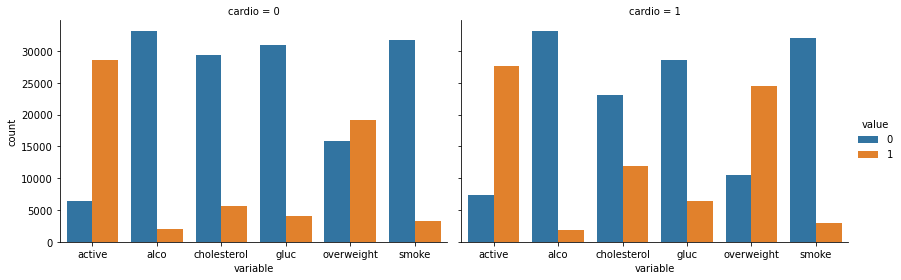

In [10]:
test_01 = draw_catplot()

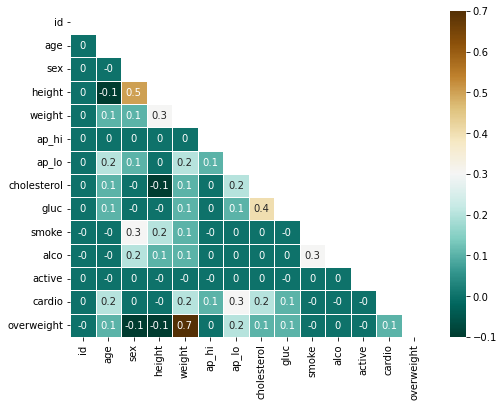

In [11]:
test_02 = draw_heatmap()